## Import Data


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
data = pd.read_csv('/Users/muhammadzuamaalamin/Documents/Matkuls2/KK/tugas/airquality (1).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   5999 non-null   int64
 1   co2     5999 non-null   int64
 2   no2     5999 non-null   int64
 3   so2     5999 non-null   int64
 4   o3      5999 non-null   int64
dtypes: int64(5)
memory usage: 234.5 KB


In [2]:
# data = data.drop(columns = ['Timestamp','deviceId','payload_id'])
# data

In [3]:
data.isnull().sum()

PM2.5    0
co2      0
no2      0
so2      0
o3       0
dtype: int64

In [4]:
data.isna().sum()

PM2.5    0
co2      0
no2      0
so2      0
o3       0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [7]:
data.describe(

)

,PM2.5,co2,no2,so2,o3
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,20.614936,2330.332889,100.995833,132.494916,124.645774
std,11.985017,2092.686367,89.962540,120.542128,59.050665
min,3.000000,40.000000,5.000000,1.000000,10.000000
25%,11.000000,624.500000,27.000000,35.000000,77.000000
50%,18.000000,1183.000000,48.000000,59.000000,123.000000
75%,28.000000,4092.500000,174.000000,229.000000,167.000000
max,48.000000,6999.000000,300.000000,400.000000,250.000000


In [8]:
## cek data Oulier

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = data[(data < lower_bound) | (data > upper_bound)].dropna(how='all').index
print(f"Number of potential outliers detected: {len(outlier_indices)}")

Number of potential outliers detected: 0


In [9]:
## Hapus data Oulier
data_cleaned_looped = data.copy() # Create a copy to avoid modifying the original data

while True:
    Q1 = data_cleaned_looped.quantile(0.25)
    Q3 = data_cleaned_looped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned_looped[(data_cleaned_looped < lower_bound) | (data_cleaned_looped > upper_bound)].dropna(how='all').index

    if len(outlier_indices) == 0:
        print("No more outliers detected.")
        break
    else:
        print(f"Removing {len(outlier_indices)} potential outliers.")
        data_cleaned_looped = data_cleaned_looped.drop(outlier_indices)

print(f"Number of rows after removing outliers iteratively: {len(data_cleaned_looped)}")
display(data_cleaned_looped.head())

No more outliers detected.
Number of rows after removing outliers iteratively: 5999


,PM2.5,co2,no2,so2,o3
0,25,40,40,40,180
1,26,6286,145,201,157
2,36,1970,152,336,76
3,47,6837,150,382,210
4,40,3979,39,373,84


In [10]:
data_cleaned_looped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   5999 non-null   int64
 1   co2     5999 non-null   int64
 2   no2     5999 non-null   int64
 3   so2     5999 non-null   int64
 4   o3      5999 non-null   int64
dtypes: int64(5)
memory usage: 234.5 KB


<Axes: >

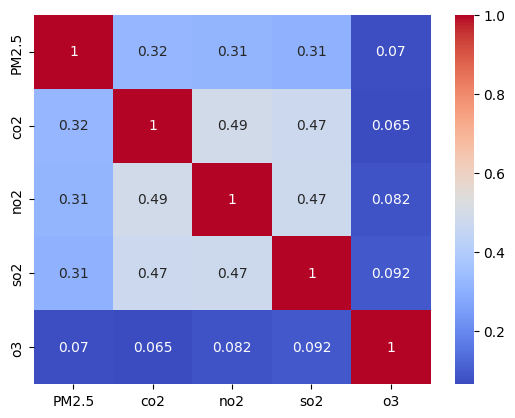

In [11]:
## Heatmap Data
import seaborn as sns
sns.heatmap(data_cleaned_looped.corr(), annot=True, cmap='coolwarm')

# Prepocessing

In [12]:
from sklearn.model_selection import train_test_split

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X = data_cleaned_looped.copy()

# Split sebelum apa pun!
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=None)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_test)         # HANYA TRANSFORM, TIDAK FIT

In [14]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Parameter awal (bisa di-tune)
dbscan = DBSCAN(eps=0.5, min_samples=5)
train_clusters = dbscan.fit_predict(X_train_scaled)

# Jumlah cluster dan noise
n_clusters = len(set(train_clusters)) - (1 if -1 in train_clusters else 0)
n_noise = list(train_clusters).count(-1)

print(f"✅ Number of clusters found: {n_clusters}")
print(f"⚠️ Number of noise points: {n_noise}")
print(f"📊 Cluster labels: {np.unique(train_clusters)}")

✅ Number of clusters found: 9
⚠️ Number of noise points: 2729
📊 Cluster labels: [-1  0  1  2  3  4  5  6  7  8]


In [15]:
# Hanya evaluasi jika ada lebih dari 1 cluster (bukan semua noise)
if n_clusters > 1:
    try:
        sil_score = silhouette_score(X_train_scaled, train_clusters)
        print(f"🟢 Silhouette Score: {sil_score:.4f}")
    except ValueError as e:
        print(f"🟡 Silhouette Score: Cannot compute (likely because of noise or single cluster) — {e}")

    try:
        db_index = davies_bouldin_score(X_train_scaled, train_clusters[train_clusters != -1])
        print(f"🔵 Davies-Bouldin Index: {db_index:.4f}")
    except ValueError as e:
        print(f"🟡 Davies-Bouldin: Cannot compute — {e}")
else:
    print("🔴 Only 1 cluster or all noise — clustering quality metrics not applicable.")


🟢 Silhouette Score: -0.0555
🟡 Davies-Bouldin: Cannot compute — Found input variables with inconsistent numbers of samples: [4799, 2070]


In [ ]:
X_train_scaled

array([[-1.58503773e+00, -8.03544189e-01, -3.99027108e-01,
        -6.11104426e-01, -6.48622162e-01, -6.28020103e-01],
       [-4.89428755e-01,  2.10786569e+00, -3.99027108e-01,
        -3.48980865e-01, -8.81083031e-01,  2.72281081e-01],
       [ 6.06180221e-01,  1.56197634e+00, -3.99027108e-01,
         2.53437830e+00, -6.74699883e-02,  2.19072592e-03],
       ...,
       [ 6.06180221e-01,  1.19805010e+00, -9.74364797e-01,
         1.28929139e+00,  8.62373489e-01, -1.79841164e+00],
       [ 6.06180221e-01, -8.94525747e-01, -3.99027108e-01,
         2.40797147e-01,  5.13682185e-01,  6.77416614e-01],
       [-1.58503773e+00,  2.10786569e+00, -3.99027108e-01,
        -8.73227987e-01, -9.97313466e-01, -6.73035163e-01]])

In [ ]:
# Assign cluster ke Train & Test
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)   # HANYA PREDICT, TIDAK FIT

              SO2       NO2        CO        O3      PM2.5        PM10
Cluster                                                               
0        0.031005  0.131128  3.360704  0.323041  60.954951   93.241804
1        0.039658  0.048259  3.592431  0.223145  62.104143   58.031865
2        0.035146  0.036189  3.508598  0.182796  66.532734  106.100275


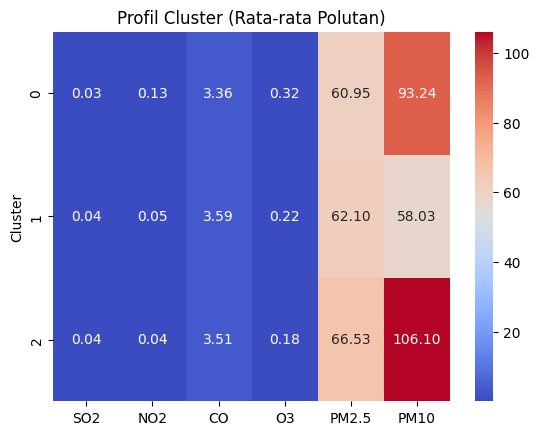

In [ ]:
# Tambahkan ke dataframe
X_train["Cluster"] = train_clusters
X_test["Cluster"] = test_clusters

# === 6. Profil cluster ===
cluster_profile = X_train.groupby("Cluster").mean()
print(cluster_profile)

sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster (Rata-rata Polutan)")
plt.show()

In [ ]:
# === 1. Jumlah data per cluster ===
print("Jumlah data per cluster:")
print(pd.Series(train_clusters).value_counts())

Jumlah data per cluster:
2    37148
0    32365
1    16727
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance
# Silhouette Score: Higher value means better defined clusters (range -1 to 1)
silhouette_avg = silhouette_score(X_train_scaled, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index: Lower value means better clustering (0 indicates perfect separation)
db_index = davies_bouldin_score(X_train_scaled, train_clusters)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.22446583527998898
Davies-Bouldin Index: 1.6616092446951178


In [ ]:
# Gabungkan kembali train dan test yang sudah di-scale
import numpy as np

X_final = np.vstack([X_train_scaled, X_test_scaled])  # Gabung array
y_final = np.hstack([train_clusters, test_clusters])   # Gabung label cluster

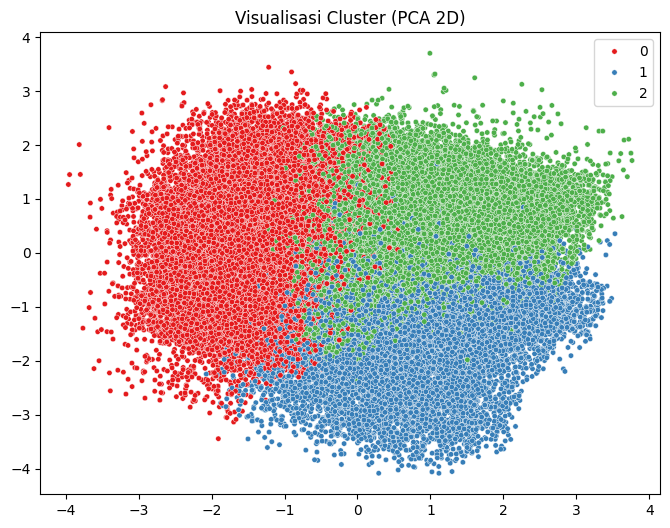

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# === 2. Scatterplot cluster (PCA 2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train_clusters, palette="Set1", s=15)
plt.title("Visualisasi Cluster (PCA 2D)")
plt.show()

In [ ]:

# === 3. Siapkan data untuk klasifikasi ===

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)



=== Random Forest ===
Accuracy: 0.9855751391465677
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8105
           1       0.98      0.98      0.98      4193
           2       0.99      0.99      0.99      9262

    accuracy                           0.99     21560
   macro avg       0.99      0.99      0.99     21560
weighted avg       0.99      0.99      0.99     21560



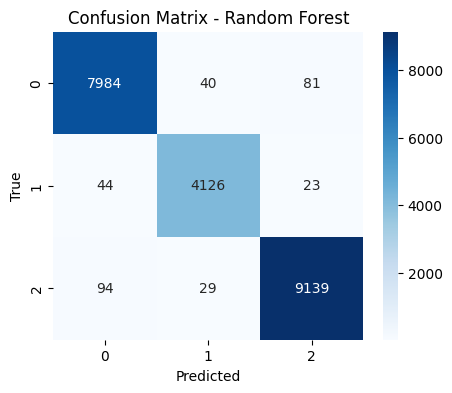


=== SVM ===
Accuracy: 0.9960575139146568
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8105
           1       0.99      0.99      0.99      4193
           2       1.00      1.00      1.00      9262

    accuracy                           1.00     21560
   macro avg       1.00      1.00      1.00     21560
weighted avg       1.00      1.00      1.00     21560



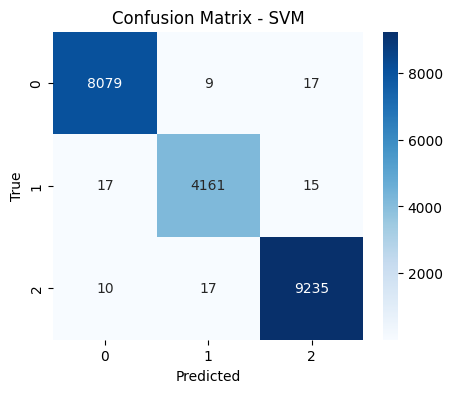


=== KNN ===
Accuracy: 0.9831168831168832
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8105
           1       0.98      0.98      0.98      4193
           2       0.99      0.98      0.99      9262

    accuracy                           0.98     21560
   macro avg       0.98      0.98      0.98     21560
weighted avg       0.98      0.98      0.98     21560



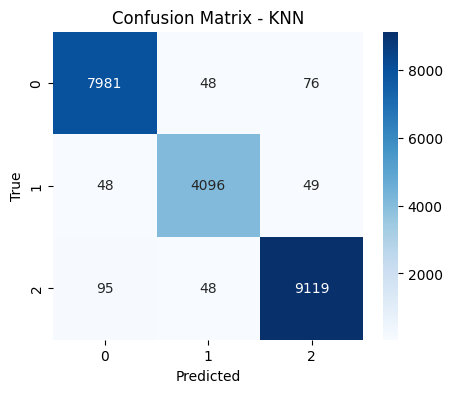


=== Naive Bayes ===
Accuracy: 0.9462894248608534
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      8105
           1       0.95      0.94      0.94      4193
           2       0.96      0.94      0.95      9262

    accuracy                           0.95     21560
   macro avg       0.95      0.95      0.95     21560
weighted avg       0.95      0.95      0.95     21560



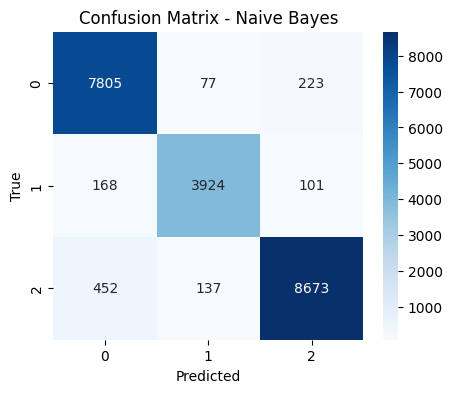


=== Decition Tree ===
Accuracy: 0.9755102040816327
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      8105
           1       0.97      0.97      0.97      4193
           2       0.98      0.98      0.98      9262

    accuracy                           0.98     21560
   macro avg       0.97      0.97      0.97     21560
weighted avg       0.98      0.98      0.98     21560



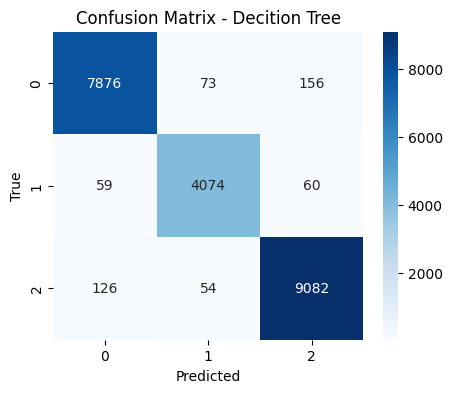

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# === 4. Definisi model ===
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decition Tree": DecisionTreeClassifier(random_state=42),
}

# === 5. Training & Evaluasi ===
for name, model in models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)

    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test_cls, y_pred))
    print(classification_report(y_test_cls, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test_cls, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()